# **Import Modules**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import matplotlib.pyplot as plt

# **Loading Dataset**

In [12]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_images , test_images = train_images/255.0 , test_images/255.0
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# **Analyzing the Images**

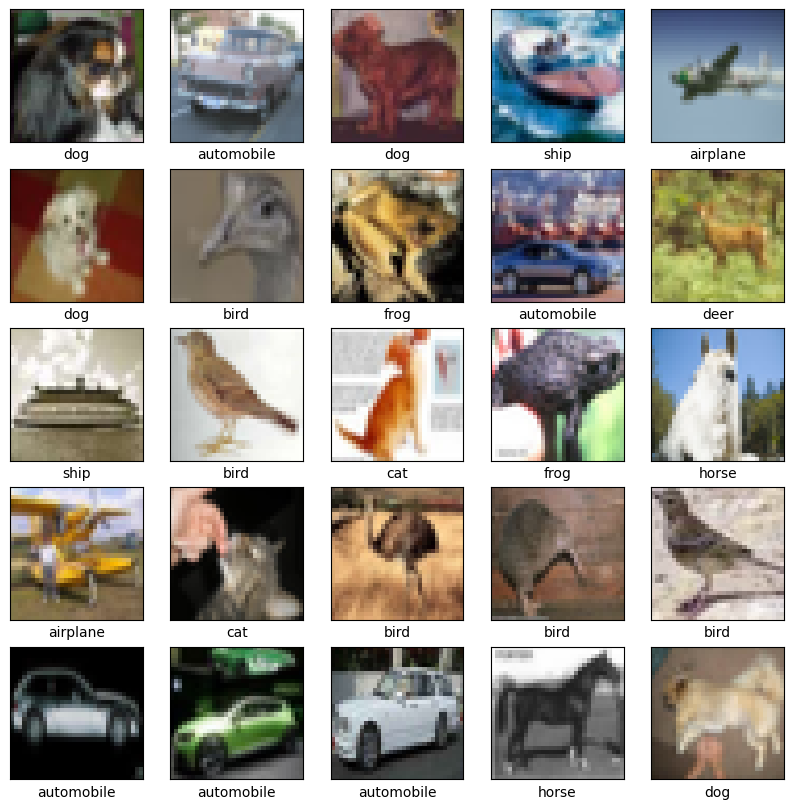

In [7]:
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 25)

plt.figure(figsize=(10, 10))

for i in range(len(sampler)):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[sampler[i]][0]])
plt.show()

# **Color Channels**

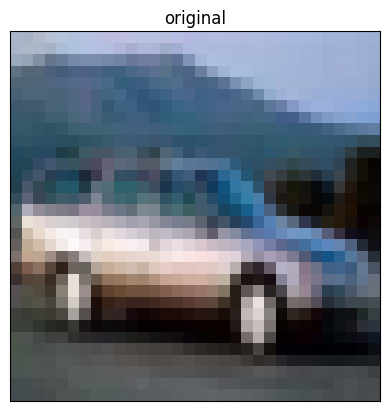

In [9]:
image_id = 4
plt.figure()
plt.imshow(train_images[image_id], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('original')
plt.show()

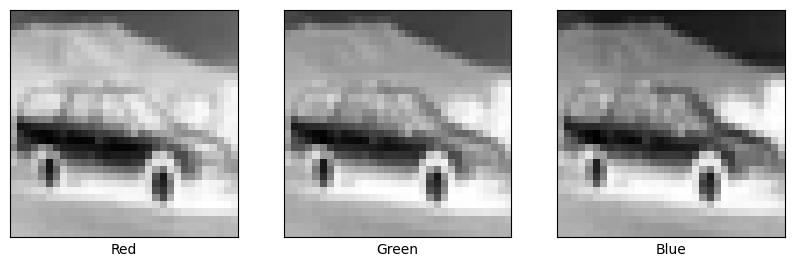

In [10]:
channel = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10, 10))

for i in range(3):
  plt.subplot(1, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[image_id][:, :, i], cmap=plt.cm.binary)
  plt.xlabel(channel[i])
plt.show()



# **Build, Compile, and Train the Model**

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000],test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:],test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATAET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

#train
model.fit(train_dataset,
          epochs=10,
          validation_data=validation_dataset)

_,accuracy = model.evaluate(test_dataset)
print(f"the model accuracy is {accuracy * 100: 0.1f}%")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.2726 - loss: 2.0085 - val_accuracy: 0.3488 - val_loss: 1.8191
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3856 - loss: 1.7313 - val_accuracy: 0.4202 - val_loss: 1.6388
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4198 - loss: 1.6367 - val_accuracy: 0.4332 - val_loss: 1.5980
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4349 - loss: 1.5901 - val_accuracy: 0.4430 - val_loss: 1.5590
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4450 - loss: 1.5585 - val_accuracy: 0.4454 - val_loss: 1.5430
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4604 - loss: 1.5158 - val_accuracy: 0.4550 - val_loss: 1.5142
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4699 - loss: 1.4879 - val_accuracy: 0.4730 - val_loss: 1.4752
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4729 - loss: 1.4698 - val_accuracy: 0.4

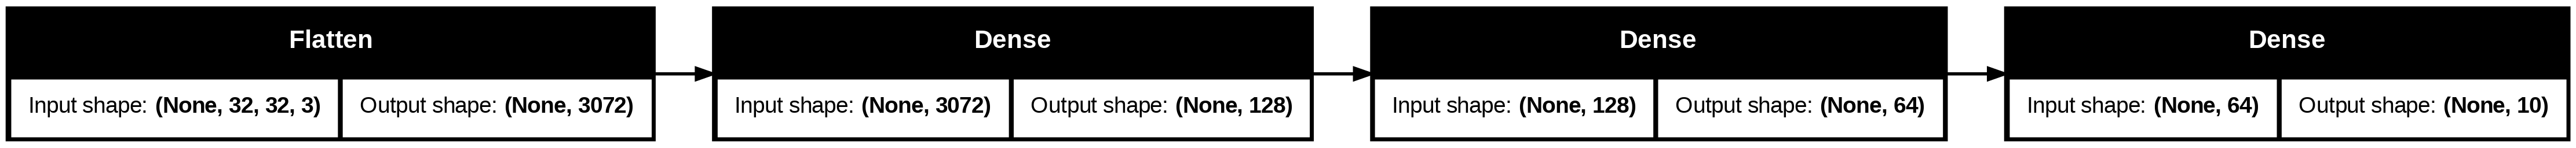

In [15]:
# plot the model
keras.utils.plot_model(model, show_shapes=True, rankdir='LR')

# **Make Predicitons**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
truck


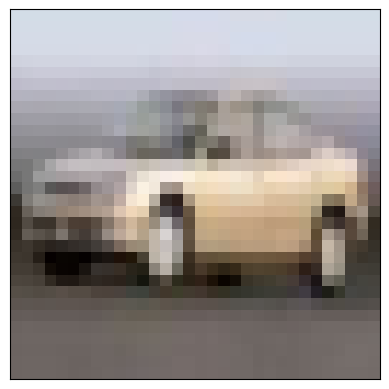

In [19]:
image_id = 7260 # pick an image id between 5000 and 9999 inclusive

def get_prediction(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  print(class_names[pred])
  plt.figure()
  plt.imshow(test_images[image_id], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.show()

get_prediction(image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


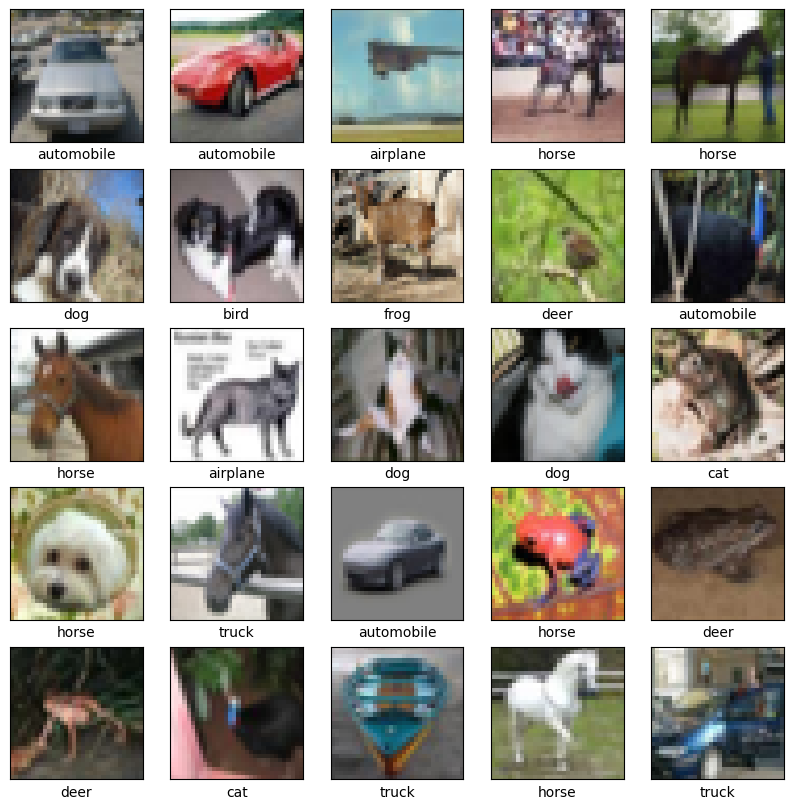

In [20]:
test_idx = list(range(5000,10000))

random.seed(1)
random_sample = random.sample(test_idx, 25)

def get_pred_id(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  return pred

pred_labels = [get_pred_id(i) for i in random_sample]


plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_sample[i]], cmap=plt.cm.binary)
    #plt.xlabel(class_names[test_labels[random_sample[i]][0]])
    plt.xlabel(class_names[pred_labels[i]])

plt.show()

# **Try with More Layers**

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10),
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.2321 - loss: 2.0847 - val_accuracy: 0.3830 - val_loss: 1.7529
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.3827 - loss: 1.7246 - val_accuracy: 0.5000 - val_loss: 1.7168
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.4205 - loss: 1.6234 - val_accuracy: 0.4479 - val_loss: 1.5594
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.4395 - loss: 1.5642 - val_accuracy: 0.3750 - val_loss: 1.6446
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.4570 - loss: 1.5146 - val_accuracy: 0.4708 - val_loss: 1.4839
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.4766 - loss: 1.4626 - val_accuracy: 0.3750 - val_loss: 1.4413
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.4880 - loss: 1.4327 - val_accuracy: 0.4740 - val_loss: 1.4653
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 187ms/step - accuracy: 0.4957 - loss: 1.4053 

# **Include Only One Channel**

In [23]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images[:,:,:,0], train_labels))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [24]:
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000][:,:,:,0], test_labels[:5000]))
validation_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [25]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:][:,:,:,0], test_labels[5000:]))
test_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [26]:
TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10),
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2036 - loss: 2.1614 - val_accuracy: 0.3083 - val_loss: 1.9741
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2916 - loss: 1.9719 - val_accuracy: 0.3750 - val_loss: 1.9253
Epoch 3/10
 12/391 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3243 - loss: 1.9086  

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3187 - loss: 1.9015 - val_accuracy: 0.3347 - val_loss: 1.8809
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3368 - loss: 1.8497 - val_accuracy: 0.6250 - val_loss: 1.8114
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3503 - loss: 1.8141 - val_accuracy: 0.3480 - val_loss: 1.8170
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3628 - loss: 1.7876 - val_accuracy: 0.6250 - val_loss: 1.7070
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3727 - loss: 1.7634 - val_accuracy: 0.3730 - val_loss: 1.7796
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3816 - loss: 1.7406 - val_accuracy: 0.6250 - val_loss: 1.5222
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3870 - loss: 1.7272 - val_accuracy: 0.3870 - val_loss: 1.7577
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3928 - loss: 1.7036 - val_accuracy: 0.6250 - va